In [7]:
%cd '/content/drive/MyDrive/'
%ls

/content/drive/MyDrive
'CFB1 Online Boiler Load Optimization r1.xlsm'   HW1.pdf
'Colab Notebooks'/                               K2D-Regular.ttf
 Customer_Behaviors.xlsx                         ML.pdf
'Customer Survey.xlsx'                          'Power Performance'/
 data/                                          'Supermarket Data.csv'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
from sklearn.cluster import KMeans
import numpy as np

import matplotlib as mpl
from google.colab import drive
drive.mount('/content/drive')


mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
filename = 'Supermarket Data.csv'
df = pd.read_csv(filename)
df.head(10)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02
5,200746,20080108,3,15,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000556927,MM,NaN,994109200504187,L,MM,Top Up,Fresh,STORE00001,LS,E02
6,200731,20070929,7,18,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237810,L,MM,Full Shop,Fresh,STORE00001,LS,E02
7,200732,20071004,5,21,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000128681,UM,YF,994107800252439,M,UM,Small Shop,Fresh,STORE00001,LS,E02
8,200738,20071116,6,18,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000961918,MM,OT,994108400798165,L,UM,Top Up,Fresh,STORE00001,LS,E02
9,200738,20071115,5,15,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000961918,MM,OT,994108400798164,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [10]:
df = df.groupby('CUST_CODE').agg(
        total_visit=('BASKET_ID', pd.Series.nunique),                                        
        total_spend=('SPEND', sum), 
        )
    

In [11]:
df

,total_visit,total_spend
CUST_CODE,,
CUST0000000181,1,2.44
CUST0000000369,220,959.33
CUST0000000689,16,328.57
CUST0000000998,3,5.95
CUST0000001163,4,39.74
...,...,...
CUST0000999593,30,453.58
CUST0000999645,11,105.11
CUST0000999654,1,5.86


**Run elbow method find the best K.**

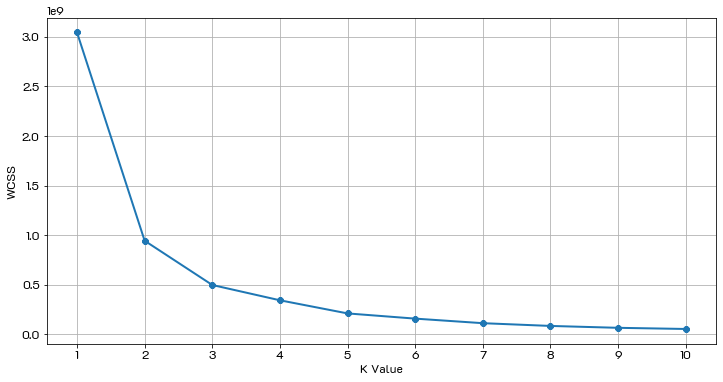

In [13]:


wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()